In [1]:
import numpy as np

import config
from settings import settingsfrom src.interfaces.pose import Pose, Position
import matplotlib.pyplot as plt

In [2]:
position = Position(POSITIONS.READY)

#print("\nlocal\n", position.local)
print("\nworld\n", position.world)

rotated = position.rotated(10)
#print("\nrotated local\n", rotated.local)
print("\nrotated world\n", rotated.world)

offsets = rotated.local-position.local
print("\nlocal offsets\n", rotated.world-position.world)

world_offsets = rotated.world-position.world
print("\nworld local offsets\n", world_offsets)




world
 [[ 106.    66.   129.6]
 [ 106.   -76.   129.6]
 [-106.   -76.   129.6]
 [-106.    66.   129.6]]

rotated world
 [[  92.92884209   83.40401853  129.6       ]
 [ 117.58688332  -56.4386824   129.6       ]
 [ -91.19236032  -93.25209606  129.6       ]
 [-115.85040155   46.59060487  129.6       ]]

local offsets
 [[-13.07115791  17.40401853   0.        ]
 [ 11.58688332  19.5613176    0.        ]
 [ 14.80763968 -17.25209606   0.        ]
 [ -9.85040155 -19.40939513   0.        ]]

world local offsets
 [[-13.07115791  17.40401853   0.        ]
 [ 11.58688332  19.5613176    0.        ]
 [ 14.80763968 -17.25209606   0.        ]
 [ -9.85040155 -19.40939513   0.        ]]


In [3]:
num_steps = 90
leg1_x = np.hstack([
    np.sin(np.radians(np.linspace(0,180,num_steps*2)))*offsets[0][0],
    np.zeros(num_steps*2)
])
leg1_y = np.hstack([
    np.sin(np.radians(np.linspace(0,180,num_steps*2)))*offsets[0][1],
    np.zeros(num_steps*2),
])
leg1_z = np.hstack([
    np.sin(np.radians(np.linspace(0,180, num_steps)))*50,
    np.zeros(num_steps*3)
])

leg2_x = np.hstack([
    np.zeros(num_steps*2),
    np.sin(np.radians(np.linspace(0,180,num_steps*2)))*offsets[1][0],
])
leg2_y = np.hstack([
    np.zeros(num_steps*2),
    np.sin(np.radians(np.linspace(0,180,num_steps*2)))*offsets[1][1],
])
leg2_z = np.hstack([
    np.zeros(num_steps*2),
    np.sin(np.radians(np.linspace(0,180, num_steps)))*50,
    np.zeros(num_steps),
])

leg3_x = np.hstack([
    np.sin(np.radians(np.linspace(0,180,num_steps*2)))*offsets[2][0],
    np.zeros(num_steps*2)
])
leg3_y = np.hstack([
    np.sin(np.radians(np.linspace(0,180,num_steps*2)))*offsets[2][1],
    np.zeros(num_steps*2),
])
leg3_z = np.hstack([
    np.sin(np.radians(np.linspace(0,180, num_steps)))*50,
    np.zeros(num_steps*3)
])

leg4_x = np.hstack([
    np.zeros(num_steps*2),
    np.sin(np.radians(np.linspace(0,180,num_steps*2)))*offsets[3][0],
])
leg4_y = np.hstack([
    np.zeros(num_steps*2),
    np.sin(np.radians(np.linspace(0,180,num_steps*2)))*offsets[3][1],
])
leg4_z = np.hstack([
    np.zeros(num_steps*2),
    np.sin(np.radians(np.linspace(0,180, num_steps)))*50,
    np.zeros(num_steps),
])


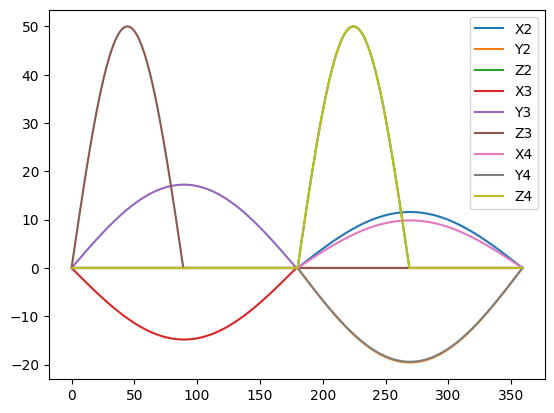

In [4]:

plt.plot(leg2_x, label="X2")
plt.plot(leg2_y, label="Y2")
plt.plot(leg2_z, label="Z2")
plt.plot(leg3_x, label="X3")
plt.plot(leg3_y, label="Y3")
plt.plot(leg3_z, label="Z3")
plt.plot(leg4_x, label="X4")
plt.plot(leg4_y, label="Y4")
plt.plot(leg4_z, label="Z4")
plt.legend()
plt.show()

In [5]:
def plotit(gait):
    plt.plot(gait.steps1, label=["s1_x","s1_y","s1_z"])
    plt.plot(gait.steps2, label=["s2_x","s2_y","s2_z"])
    plt.legend()
    plt.show()

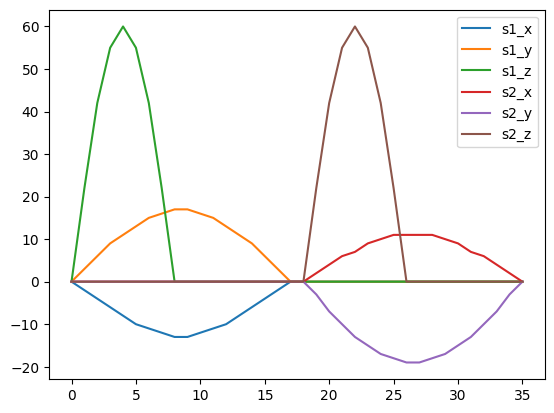

In [6]:
from src.motion.gaits.turn import Turn
gait = Turn(degrees=10, p0=POSITIONS.READY, step_size=5)
plotit(gait)